# Using sklearn models <a class="tocSkip">

<font size=1>

    Paolo Bonfini, 2025. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

In the following example we will see how to use `sklearn`'s models to fit some data.

We will try a simple **linear** model and then switch to a more **complex** one.

_NOTE: We saw a lot of linear models in the previous lecture, but here we see how to define and fit them in `sklearn`._

# Sklearn datasets

Scikit-learn provides several **built-in datasets** for practicing ML.

We will use the **Diabetes** dataset, which contains:
- 10 baseline health variables for patients ($\pmb{X}$)
- a target value representing disease progression one year later ($y$)

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()

# Convert dataset to pandas dataframe
df_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_data["disease_progression"] = diabetes.target

# Preview
display(df_data.head(5))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Each **row** in the Diabetes dataset corresponds to a **single patient**.

The **columns** represent:

- **age** — age of the patient  
- **sex** — sex of the patient  
- **bmi** — body mass index (weight in kg / height in m²)  
- **bp** — average blood pressure  
- **s1** — total serum cholesterol  
- **s2** — low-density lipoprotein cholesterol (LDL)  
- **s3** — high-density lipoprotein cholesterol (HDL)  
- **s4** — total cholesterol / HDL ratio  
- **s5** — log of serum triglycerides level  
- **s6** — blood sugar level  
- **disease_progression** — a quantitative measure of how much the disease has progressed one year after baseline

Our objective will be to predict **disease_progression** ($y$) using one of the other variables $-$ let's use **bmi**

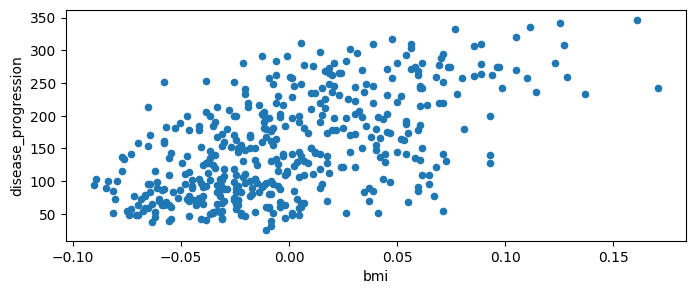

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = np.c_[df_data["bmi"]]
y = np.c_[df_data["disease_progression"]] # 2D array
# OR:
#y = np.c_[df_data["**disease_progression**"]].flatten() # 1D array

# Visualize the data (using pandas plotting methods)
df_data.plot(kind='scatter', x='bmi', y='disease_progression', figsize=(8,3))
plt.show()

# Fitting

Prediction for bmi == 0: [[149.42262605]]


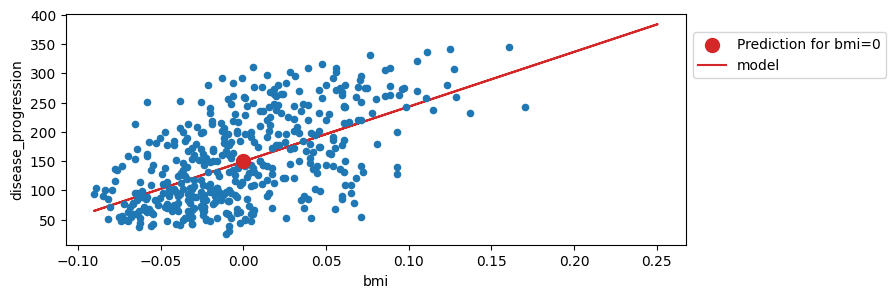

In [26]:
# Select a linear model
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
'''
That is all there is to do in `sklearn` to define a linear model!

# This defines the generic multi-dimensional linear model (see previous lecture).
# The actual dimensionality of the model is sorted out internally, from the data
# we will pass.
# '''

# Train the model
model.fit(X, y)

# Make a prediction for bmi == 0
X_new = [[0.0]]
print('Prediction for bmi == 0: %s' % model.predict(X_new))

# Plot prediction on top of previous plot
df_data.plot(kind='scatter', x='bmi', y='disease_progression', figsize=(8,3))
plt.scatter(X_new, model.predict(X_new), c='C3', s=100, label='Prediction for bmi=0')
'''When we plotted above, we created a `figure` object implicitly.
If you keep plotting without invoking `plt.show()`, you keep adding to the
same figure.'''

# Predict for the whole training set
yhat = model.predict(X)

# Plot all predictions
plt.plot(X, yhat, label='model', c='C3', zorder=-1)

plt.legend(loc='upper left', bbox_to_anchor=(1., 0.95))
plt.show()

- Notice how <u>all</u> the sklearn inputs ($\pmb{X}$) are expected to be 2D:


In [4]:
print("Shape of the X input:", np.shape(X))
print("Shape of the X_new input:", np.shape(X_new))

Shape of the X input: (442, 1)
Shape of the X_new input: (1, 1)


- For the target ($\pmb{y}$), you can input <u>1D or 2D</u>, but if you input 2D (/1D) you get returned 2D (/1D):

In [5]:
print("Shape of the y input:", np.shape(y))
print("Shape of the yhat output:", np.shape(yhat))

Shape of the y input: (442, 1)
Shape of the yhat output: (442, 1)


## What if I want to switch to another model?

E.g., switch from **Linear Regression** model to **k-Nearest Neighbors** regression (_take it as a black box for now_)<br>
$\rightarrow$ replace these two lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [6]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for bmi==0
print(model1.predict(X_new))

[[162.33333333]]


# Regularization issue

Let's assume we have an **overfitting** problem $-$ we use the same data as before ... _plus a few more data points_.

In [7]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()

# Restric to the columns of interest
df_data = pd.DataFrame(diabetes.data[:, 2], columns=["bmi"])
df_data["disease_progression"] = diabetes.target

# Preview
display(df_data.head(5))

,bmi,disease_progression
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


Let's now add some [mock] data **extending** the set we used so far:

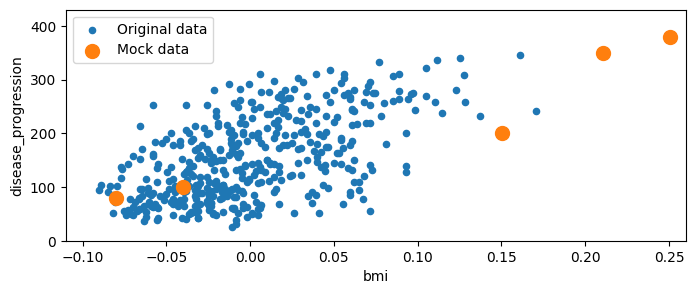

In [25]:
import matplotlib.pyplot as plt

# Get min and max BMI
min_bmi, max_bmi = df_data["bmi"].min(), df_data["bmi"].max()

# Mock data: some inside the range, some beyond
data_added = {
    "mock1": (min_bmi + 0.01, 80),    # inside range
    "mock2": (min_bmi + 0.05, 100),   # inside range
    "mock3": (max_bmi - 0.02, 200),   # inside range
    "mock4": (max_bmi + 0.04, 350),   # beyond range
    "mock5": (max_bmi + 0.08, 380),   # beyond range
}

# Convert to DataFrame
df_data_added = pd.DataFrame.from_dict(data_added).T.reset_index()
df_data_added = df_data_added.rename(columns={"index": "ID", 0: "bmi", 1: "disease_progression"})

# Extend dataset
df_data_ext = pd.concat([df_data, df_data_added[["bmi", "disease_progression"]]], ignore_index=True)

# Plot
ax = df_data.plot(kind='scatter',  x='bmi', y='disease_progression', color="C0", figsize=(8,3), label="Original data")
df_data_added.plot(kind='scatter', x='bmi', y='disease_progression', color="C1", s=100, label="Mock data", ax=ax)
plt.axis([-0.11, 0.26, 0, 430])

plt.show()

## Fitting a ridiculously overfitting "black box" model

We will use the `KNeighborsRegressor` algorithm.

Simply speaking, `KNeighborsRegressor` just takes the average of the nearest $k$ points, but we will think of it as a "_black box_", for the purpose of this example.

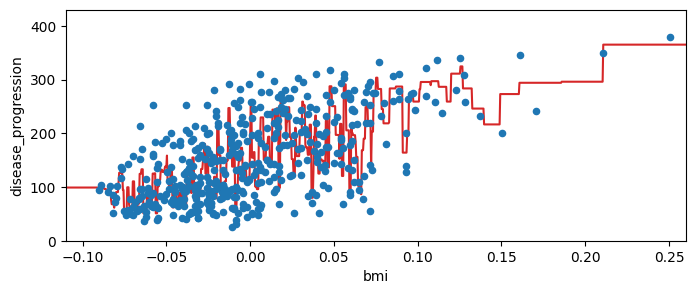

In [9]:
import sklearn.neighbors
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = np.c_[df_data_ext["bmi"]]
y = np.c_[df_data_ext["disease_progression"]] # 2D array

# Normalize, for good habits
scaler = StandardScaler()
X_n = scaler.fit_transform(X)

# Fit
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
model.fit(X_n, y)

# Predict on a range, to display the model curve
xx = np.linspace(-0.11, 0.26, 1000)
xx_n = scaler.transform(xx.reshape(-1, 1))
''' `x` this needs to be normalized as well'''
yy_model = model.predict(xx_n)

# Plot
df_data_ext.plot(kind='scatter', x='bmi', y='disease_progression', figsize=(8,3))
plt.axis([-0.11, 0.26, 0, 430])
# ^This is here only to have the same range as the above figure

plt.plot(xx, yy_model, label='model', c='C3', zorder=-1)
plt.show()

> _As you can see, it [almost] goes through each and every point._

$\rightarrow$ A model like this needs to be **regularized** == reduce its "_degrees of freedom_"

## Regularization alternative: bootstrapping


We will see proper _regularization_ tricks in the future classes

> Now let's see how we can place **confidence intervals** to a model.

- using **parameters** $\rightarrow$ We could sample models around the _best-fitting_ form the parameter errors (_see e.g., Least Squares_)
- using the **data** &emsp;&ensp; $\rightarrow$  We could <u>resample the data</u> multiple times and fit again.

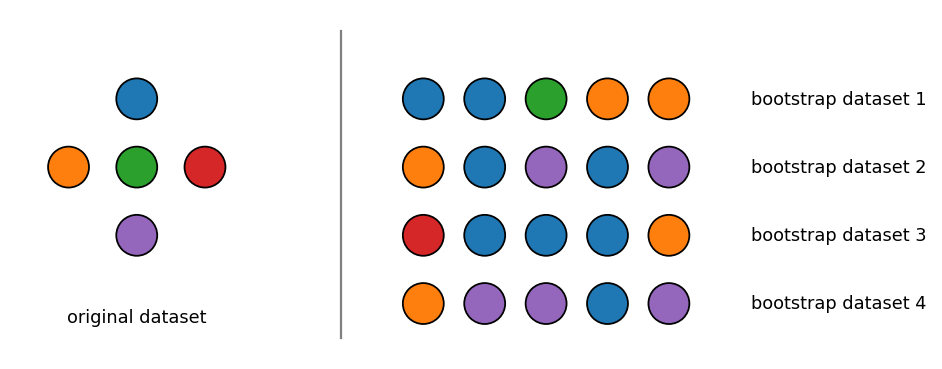

In [10]:
from __future__ import annotations
from typing import List, Tuple
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_bootstrap_diagram(
    seed: int | None = 42,
) -> Tuple[plt.Figure, List[List[int]]]:
    """
    Draw a bootstrapping diagram with an original sample of N unique colors (diamond layout)
    on the left, and 4 bootstrap samples (with replacement) on the right.
    Numbers are not shown; colors identify items.

    Parameters
    ----------
    seed : int | None, optional
        Random seed for reproducibility.

    Returns
    -------
    fig : matplotlib.figure.Figure
        The matplotlib figure object.
    samples : list[list[int]]
        List of bootstrap samples (indices of the original sample).
    """
    if seed is not None:
        random.seed(seed)

    # 5 distinct colors
    palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
    n_samples = len(palette)

    # Diamond-like layout for original sample
    spacing = 1.0
    left_positions = [
        (0.0, 2.0 * spacing),
        (-spacing, spacing),
        (0.0, spacing),
        (spacing, spacing),
        (0.0, 0.0),
    ]

    # Bootstrap samples: 4 rows, each with N draws (with replacement)
    n_bootstraps = 4
    draws_per_row = n_samples
    samples: List[List[int]] = [
        [random.randrange(n_samples) for _ in range(draws_per_row)] for _ in range(n_bootstraps)
    ]

    # Figure
    fig_w, fig_h = 6, 4
    fig = plt.figure(figsize=(fig_w, fig_h), dpi=160)
    ax = plt.gca()
    ax.set_aspect("equal")
    ax.axis("off")

    # Draw separator line
    sep_x = 3.0
    ax.plot([sep_x, sep_x], [-1.5, 3.0], linewidth=1, c='grey')

    # Draw original sample balls
    radius = 0.3
    for idx, (x, y) in enumerate(left_positions):
        circ = Circle((x, y), radius=radius, facecolor=palette[idx], edgecolor="black", linewidth=0.8)
        ax.add_patch(circ)

    ax.text(0.0, -1.2, "original dataset", ha="center", va="center", fontsize=8)

    # Draw bootstrap samples
    start_x = sep_x + 1.2
    row_y0 = 2.0
    row_gap = 1.0
    col_gap = 0.9

    for row_idx, row in enumerate(samples):
        y = row_y0 - row_idx * row_gap
        for col_idx, item_idx in enumerate(row):
            x = start_x + col_idx * col_gap
            circ = Circle((x, y), radius=radius, facecolor=palette[item_idx], edgecolor="black", linewidth=0.8)
            ax.add_patch(circ)

        ax.text(start_x + draws_per_row * col_gap + 0.3, y, f"bootstrap dataset {row_idx+1}",
                ha="left", va="center", fontsize=8)

    plt.tight_layout()
    return fig, samples

fig, samples = draw_bootstrap_diagram(seed=42)
plt.show()

**Bootstrapping == random sampling with replacement**

> _The assumption is that every bootstrapped sampled is a representative sub-sample of the true population._

<u>IMPORTANT:</u> There is **replacement** $-$ some samples can appear multiple times in a bootstrapped dataset.

This is how to do it in python:

In [11]:
from sklearn.utils import resample

n_bootstraps = 10

# Perform bootstrapping multiple times
for _ in range(n_bootstraps):
    df_bootstrap_data = resample(df_data_ext, random_state=12, replace=True)  
    
    # Prepare the data
    X = np.c_[df_bootstrap_data["bmi"]]
    y = np.c_[df_bootstrap_data["disease_progression"]] # 2D array
    
'''Notice that each bootstrapped dataset has the same lenght as the original.'''
print('Lenght of original data: %s samples' % len(df_data_ext))
print('Lenght of the last bootstapped dataset: %s samples' % len(df_bootstrap_data))
print()
print('By construction, some values may appear more than once.')
print('Number of value repetitions inside the bootstrap datasets:')
display(df_bootstrap_data.groupby(['bmi']).size())

Lenght of original data: 447 samples
Lenght of the last bootstapped dataset: 447 samples

By construction, some values may appear more than once.
Number of value repetitions inside the bootstrap datasets:


bmi
-0.083808    1
-0.081653    2
-0.080575    1
-0.079497    1
-0.077342    2
            ..
 0.128521    2
 0.160855    1
 0.170555    1
 0.210555    1
 0.250555    1
Length: 146, dtype: int64

<div style="border-left: 5px solid #FFA500; background-color: rgba(255, 165, 0, 0.15); padding: 10px; border-radius: 4px; color: inherit;">

<font size=6>**Exercise [20 min]**</font>

**Objective:** Use bootstrapping to display the `KNeighborsRegressor` model uncertainty in a plot. 

You should obtain something like this:

<img src="images/ex1_expected_result.png" width=600 style="display:block; margin-left:auto; margin-right:auto;">

<br>

**Task:**  In particular, you will have to:
1. Fit the model on each bootstrapped dataset
2. For each fitted model, add a curve to the plot

**Hints:** 
- Keep `n_bootstraps` low while you are testing, then increase it to 1000.
</div>    

In [16]:
'''Uncomment the lines, and replace "..." with the proper code''';
# from sklearn.utils import resample

# ... # Import model and normalization
# ... # Initialize figure with the data alone

# n_bootstraps = ...

# # Perform bootstrapping
# for _ in range(n_bootstraps):
#     df_bootstrap_data = resample(df_data_ext, replace=True)  
    
#     # Prepare the data:
#     X = np.c_[df_bootstrap_data["bmi"]]
#     y = np.c_[df_bootstrap_data["disease_progression"]] # 2D array

#     ...

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

_Our solution_

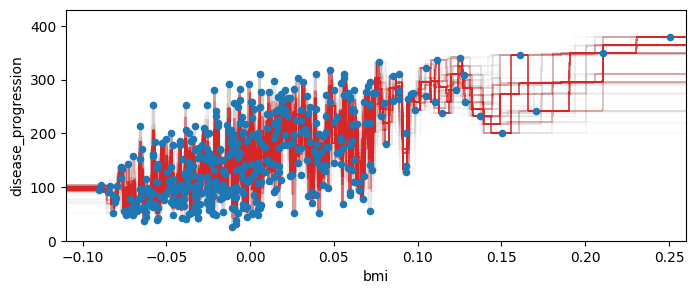

In [23]:
'''Same as above, but we repeat `n_boostraps` tiems, each time fitting on a
different bootstrapped dataset.'''
import sklearn.neighbors
from sklearn.preprocessing import StandardScaler

# Initialize plot with actual data
df_data_ext.plot(kind='scatter', x="bmi", y='disease_progression', figsize=(8,3))
plt.axis([-0.11, 0.26, 0, 430])
# ^This is here only to have the same range as the above figure

from sklearn.utils import resample

n_bootstraps = 1000

# Perform bootstrapping multiple times
for _ in range(n_bootstraps):
    df_bootstrap_data = resample(df_data_ext, replace=True)  
    
    # Prepare the data
    X = np.c_[df_bootstrap_data["bmi"]]
    y = np.c_[df_bootstrap_data["disease_progression"]] # 2D array
    '''
    And that's all, the rest is just copy-pasta from above, just replacing:
        `df_data_ext` --> `df_bootstrap_sample`
    '''

    # Normalize, for good habits
    scaler = StandardScaler()
    X_n = scaler.fit_transform(X)

    # 1. Fit
    model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
    model.fit(X_n, y)

    # 2. Predict on a range, to display the model curve
    xx = np.linspace(-0.11, 0.26, 1000)
    xx_n = scaler.transform(xx.reshape(-1, 1))
    ''' `x` this needs to be normalized as well'''
    yy_model = model.predict(xx_n)

    # Plot bootstrapped model
    plt.plot(xx, yy_model, c='C3', alpha=5/n_bootstraps, zorder=-1)

plt.show()

This gives us a better feeling of the uncertainty on the model, although in the case of `KNeighborsRegressor` we would probably need to calibrate also the hyperparameter `n_neighbors`.

$\rightarrow$ _We will see how in future classes._

<div style="border-left: 5px solid #FFA500; background-color: rgba(255, 165, 0, 0.15); padding: 10px; border-radius: 4px; color: inherit;">
    
<font size=6>**Exercise [45 min]**</font>

**Objective:** Try to find the feature that correlates the best with `disease_progression`, in the provided dataset. 

**Tasks:** 
- Perform your search by inspecting `disease_progression` _against_ any other variable of your choice in the dataset
- Fit  `disease_progression` using your best candidate variable
- _Follows, in-class discussion_

**Hints:** 
- You can use a `LinearRegression` or `KNeighborsRegressor`
    </div>

In [33]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()

# Restric to the columns of interest
df_data_full = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_data_full["disease_progression"] = diabetes.target

# Preview
display(df_data_full.head(5))
print("Dataset length: %s samples" % len(df_data_full))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Dataset length: 442 samples
